Build a regression model.

In [1]:
import statsmodels.api as sm
import pandas as pd

In [4]:
df = pd.read_csv("final_station_data.csv")
df

,station_id,Latitude,Longitude,Number of Bikes,name,category_id,category_name,review_count,distance,rating,address,postcode
0,01eedbec47378a4407f5a3fc4352fdf3,30.25759,-97.74898,5,Sandy's Hamburgers,13031,Burger Joint,1086,213,4.5,603 Barton Springs Rd,78704
1,57eb8e5d401aeabe67ff95e6f1f1f999,30.29312,-97.74412,1,Torchy’S Tacos,13145,Fast Food Restaurant,15,238,4.5,2801 Guadalupe St,78705
2,ed95d8e12ad7c2ec3ff0b7dd0f4673f2,30.28540,-97.74673,7,Pluckers Wing Bar,13022,Sports Bar,172,193,4.0,2222 Rio Grande St,78705
3,8723bfa08ec83b133f6a9aeecd075f51,30.27217,-97.75246,3,24 Diner,13049,Diner,547,150,4.5,600 N Lamar Blvd,78703
4,568256d098257d6e8433513638f5257b,30.25495,-97.74755,2,Aba Austin,13000,Dining and Drinking,1086,114,4.5,1011 S Congress Ave,78704
...,...,...,...,...,...,...,...,...,...,...,...,...
74,fe9c5e51f706fdd8981ed72ebf05eab4,30.25630,-97.71007,10,Kemuri Tatsu-ya,13026,BBQ Joint,51,381,4.5,2713 E 2nd St,78702
75,3c8c0510f41de2f9d61a1d3ed5993790,30.27041,-97.75046,3,Irene's,13049,Diner,547,77,4.5,506 West Ave,78701
76,15c906ebd3955b31efa9a1dd4de8f950,30.26634,-97.74378,7,Modern Market Eatery,13145,Fast Food Restaurant,5773,45,4.5,401 Congress Ave,78701
77,49abfbfe3cddcd1574965bef3772db3d,30.27260,-97.74127,3,Chi'Lantro,13145,Fast Food Restaurant,166,198,4.0,823 Congress Ave,78701


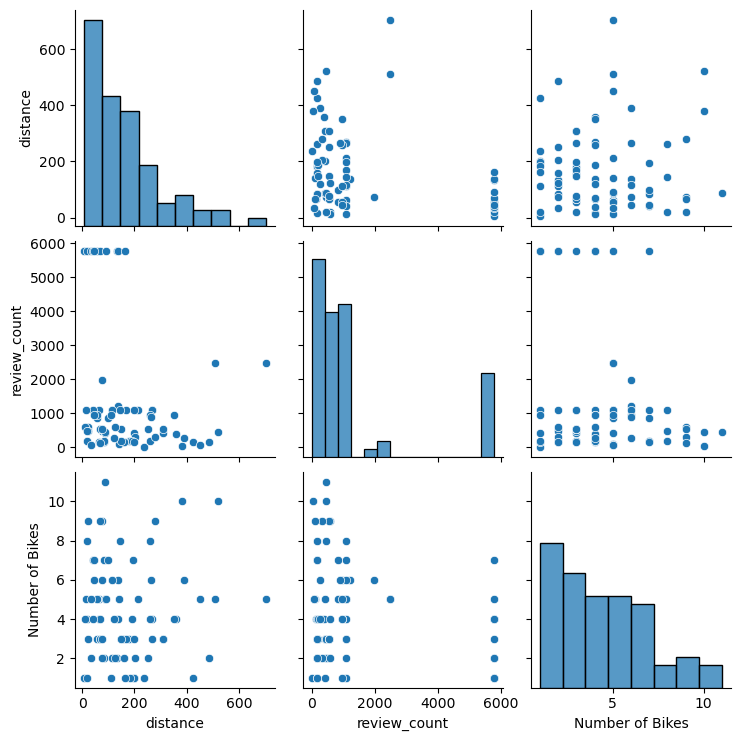

In [15]:
#Check for linearity between Number of Bikes annd two other numerical variables distance and review counts
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df, vars=['distance', 'review_count', 'Number of Bikes',])
plt.show()


This shows that there is likely linearity between number of bikes and distance

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
numeric_corr = numeric_df.corr()  # Calculate correlation on numeric columns
numeric_corr


,Latitude,Longitude,Number of Bikes,category_id,review_count,distance,rating,postcode
Latitude,1.000000,-0.234292,-0.138445,-0.006260,-0.155281,-0.091203,-0.423597,-0.198937
Longitude,-0.234292,1.000000,-0.193196,0.095438,0.023255,0.162360,0.124582,-0.113913
Number of Bikes,-0.138445,-0.193196,1.000000,-0.052477,-0.185420,0.034489,-0.000741,0.202179
category_id,-0.006260,0.095438,-0.052477,1.000000,-0.067077,-0.113443,-0.140491,-0.027566
review_count,-0.155281,0.023255,-0.185420,-0.067077,1.000000,-0.215407,0.337965,-0.139368
distance,-0.091203,0.162360,0.034489,-0.113443,-0.215407,1.000000,0.020004,0.307231
rating,-0.423597,0.124582,-0.000741,-0.140491,0.337965,0.020004,1.000000,0.030443
postcode,-0.198937,-0.113913,0.202179,-0.027566,-0.139368,0.307231,0.030443,1.000000


In [23]:
#check if the correlations between number of bikes and distance is significant  by using Pearson's correlationcoefficient test
import scipy

stat, p = scipy.stats.pearsonr(df['Number of Bikes'], df['distance'])
print (p)

0.762842277702737


Provide model output and an interpretation of the results. 

In [24]:
#Simple Linear regression 
y = df['Number of Bikes'] 
x = df['distance']
x = sm.add_constant(x)
x.head()

,const,distance
0,1.0,213
1,1.0,238
2,1.0,193
3,1.0,150
4,1.0,114


In [25]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.09170
Date:                Fri, 07 Jul 2023   Prob (F-statistic):              0.763
Time:                        22:21:05   Log-Likelihood:                -183.00
No. Observations:                  79   AIC:                             370.0
Df Residuals:                      77   BIC:                             374.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2538      0.434      9.792      0.0

Obviously My prediction that the Number od bikes is dependent on distance is not correct.

# Stretch

How can you turn the regression model into a classification model?